## Chapter 3
## Linear Regression

### Simple Linear Regression

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt
import statistics as stats
from sklearn.preprocessing import scale

It assumes that there is approximately a linear regression b/w X and y. Mathematically we can write this relationship as $$Y = \beta_0 + \beta_1 X$$
where $\beta_0$ represents _intercept_ and $\beta_1$ represents _slope_.

Once we estimate these parameters we can predict y using 
$$\hat y = \hat \beta_0 + \hat \beta_1 x$$
prediction of Y on the basis X = $x$.


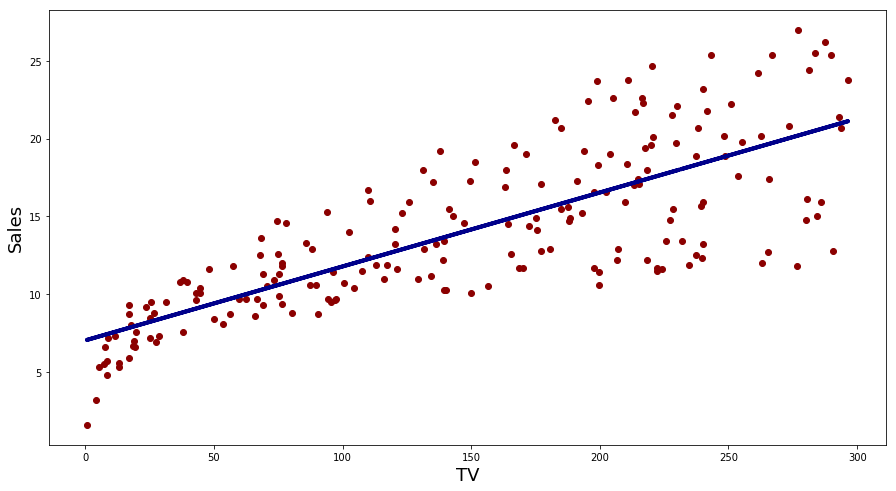

In [2]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Advertising.csv"
plt.figure(figsize = (15,8))
Advertising = pd.read_csv(url, index_col = 0)
plt.scatter(Advertising.TV, Advertising.Sales, color = "darkred")
z = np.polyfit(Advertising.TV, Advertising.Sales, 1) # fitting a straight line
f = np.poly1d(z)
plt.plot(Advertising.TV, f(Advertising.TV), linewidth = 4.0, color = "darkblue")
plt.xlabel("TV", fontsize = 18)
plt.ylabel("Sales", fontsize = 18)
plt.show()

Let $\hat y_i = \beta_0 + \hat \beta_1 x_i$ be the prediction for Y based in the ith value of X. Then $e_i = y_i - \hat y_i$ represents the ith residual (this is the difference between the ith observed response value and the ith response value predicted by the linear model. Then residual sum of square(RSS) is $$RSS = e_1^2 + e_2^2 + .... + e_n^2$$.

According to the least square approach, we are minimizing the RSS to estimate the $\beta's$.

$$\hat \beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^{n} (x_i - \bar x)^2}$$.
and $\hat \beta_0 = \bar y - \hat \beta_1 \bar x$

These are called least square estimates of the linear regression model.

In [22]:
# We can look at the coefficient of the above equation
print(z)

[0.04753664 7.03259355]


In [28]:
# Now plotting the RSS on uncentered data won't be visually appealing so we will fit the equation on centered data.
TV = scale(Advertising.TV, with_mean = True, with_std = False)
z = np.polyfit(TV, Advertising.Sales, 1) # fitting a straight line
print(z)

[ 0.04753664 14.0225    ]


In [31]:
intercept = z[1]
slope = z[0]
b0 = np.linspace(intercept - 2, intercept + 2, 50) # selecting a range of values for intercept and slope
b1 = np.linspace(slope - 0.02, slope + 0.02, 50)
X, Y = np.meshgrid(b0, b1) # Creating the mashgrid for contour plot
rss = np.zeros((b0.size, b0.size))

#Calculating RSS for all the possible combination of coefficient values
for (i,j),k in np.ndenumerate(X):
    rss[i,j] = ((Advertising.Sales - (X[i,j] + TV.ravel() * Y[i,j]))**2).sum()/1000

# Minimum value of RSS
min_RSS = ((Advertising.Sales - (intercept + TV* slope))**2).sum()/1000
min_RSS

2.102530583131352

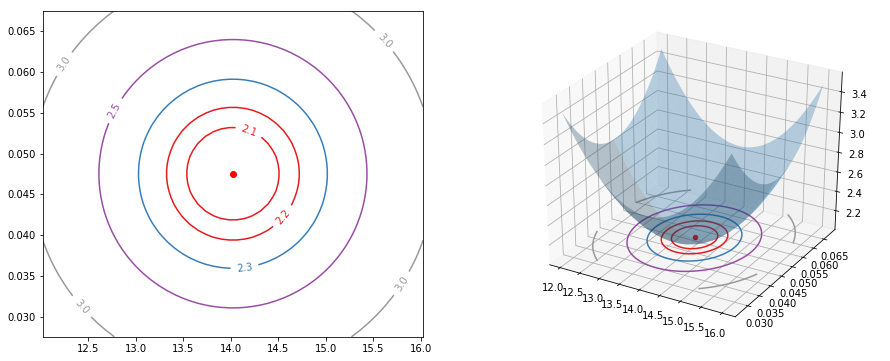

In [40]:
# Contour plot
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(121)
CS = ax1.contour(X,Y,rss, cmap = plt.cm.Set1, levels = [2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(intercept, slope, color = 'r') # plotting the minimum RSS value
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# 3D plot

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, rss, rstride = 3, cstride = 3, alpha = 0.3) # alpha will remove the grid lines from the plot
# cmap is the set of colors. offset is used so that the contour will come on the 2D surface.
ax2.contour(X,Y,rss, cmap = plt.cm.Set1, levels = [2.15, 2.2, 2.3, 2.5, 3], offset = rss.min())
ax2.scatter3D(intercept, slope, min_RSS, color = 'r')
plt.show()

As we can see from the above 2 plots. We have plotted RSS for a number of values of $\beta$ coefficients and the least square estimates provide the minimum RSS.

#### Assesing the accuracy of coefficient estimates 

$Y = f(x) + \epsilon$

If we assume the true relationship is linear $Y = \beta_0 + \beta_1 X + \epsilon$, then 

$\beta_0$ = intercept, expected value of Y when X = 0.

$\beta_1$ = slope, the average increase in Y for unit increase in X and we assume that $\epsilon$ is independent of X.

Let's assume a model
$$Y = 2 + 3X + \epsilon$$
This is the true relationship between Y and X. We can generate some random numbers from it and use least square estimation to estimate the $\beta$ coefficients.

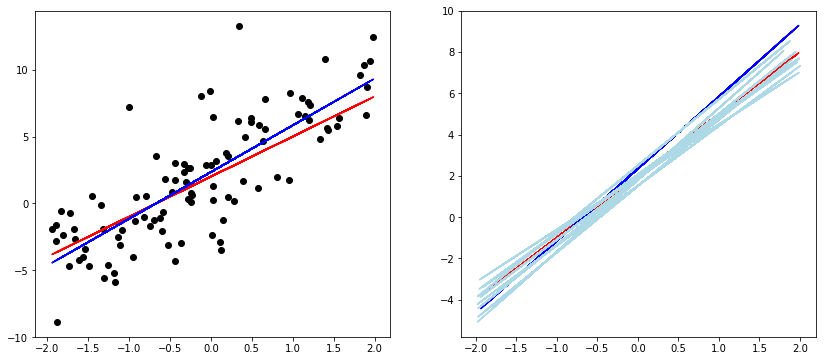

In [108]:
np.random.seed(2)
X = np.random.uniform(low = -1.99, high = 2.01, size = 100) # generating random numbers for X
e = np.random.normal(loc =0, scale = 2.5, size = 100) # generating random numbers from normal dist with mean 0.
Y = 2 + 3 * X + e # Y is coming from the model defined above
z = np.polyfit(X,Y,1) # fitting the model from the sample generated from the model
f = np.poly1d(z)

def true_f(X): # Calculating the true function
    return (2 + 3*X)

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.scatter(X,Y,color = "black", marker = 'o')
plt.plot(X, true_f(X), color = "red")
plt.plot(X, f(X), color = "blue")

plt.subplot(1,2,2)
plt.plot(X, true_f(X), color = "red")
plt.plot(X, f(X), color = "blue")
for i in range(10):
    X = np.random.uniform(low = -1.99, high = 2.01, size = 100) # generating random numbers for X
    e = np.random.normal(loc =0, scale = 2.5, size = 100) # generating random numbers from normal dist with mean 0.
    Y = 2 + 3 * X + e # Y is coming from the model defined above

    z = np.polyfit(X,Y,1) # fitting the model from the sample generated from the model
    f = np.poly1d(z)
    plt.plot(X, f(X), color = 'lightblue')


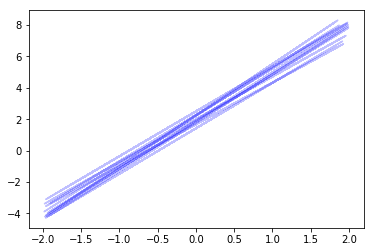

In [97]:
col = ['0.05','0.1','0.15','0.2','0.25','0.3','0.35','0.4','0.45','0.5']
for i in range(10):
    if i = 1:
        np.random.seed
        
    X = np.random.uniform(low = -1.99, high = 2.01, size = 100) # generating random numbers for X
    e = np.random.normal(loc =0, scale = 2.5, size = 100) # generating random numbers from normal dist with mean 0.
    Y = 2 + 3 * X + e # Y is coming from the model defined above

    z = np.polyfit(X,Y,1) # fitting the model from the sample generated from the model
    f = np.poly1d(z)
    plt.plot(X, f(X), color = 'blue', alpha = 0.25 )